In [16]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from utils import *
from wls import *
import matplotlib.pyplot as plt
import ipywidgets as widgets

Layer 1 / 3


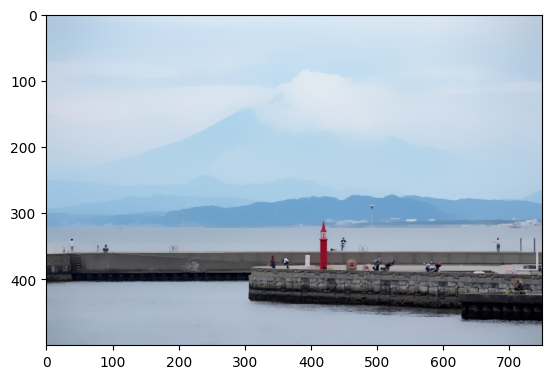

Layer 2 / 3


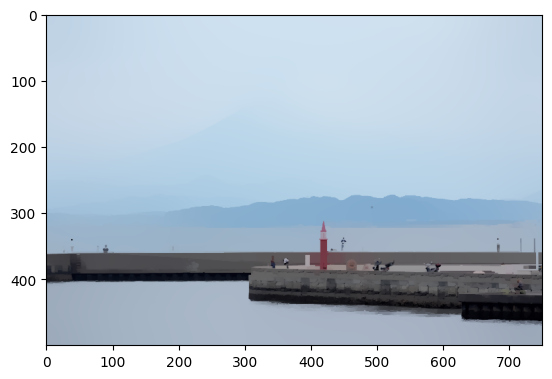

Layer 3 / 3


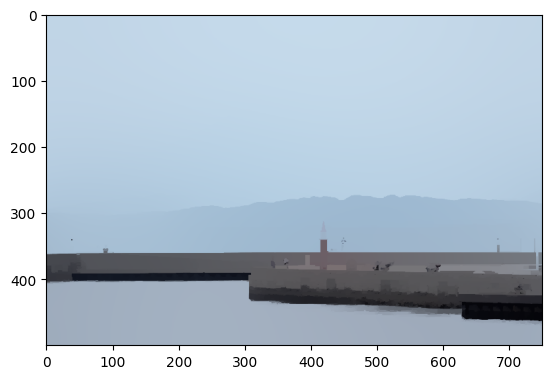

In [27]:
IMAGE_PATH = "../data/fuji.png"

image = load_image(IMAGE_PATH, gray=False, verbose=False)

decomposition = wls(image, 0.1, 1.8, c=4, verbose=True)


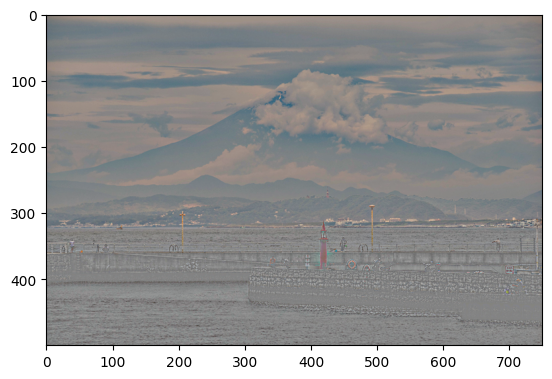

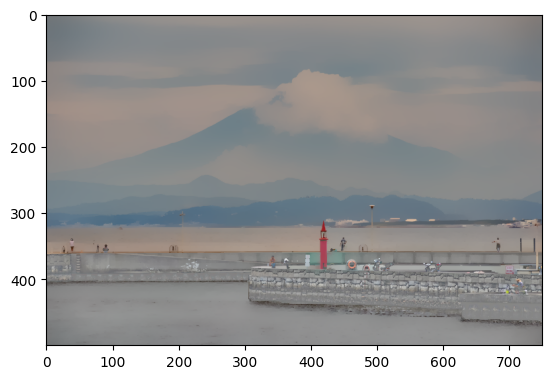

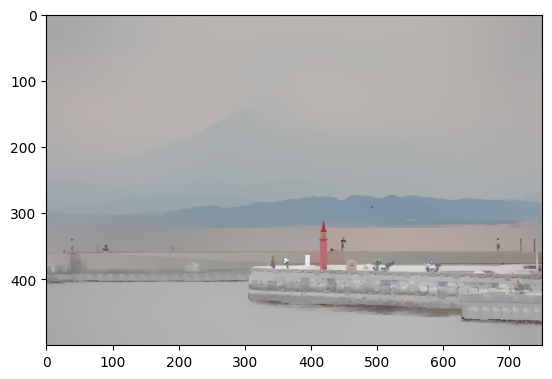

In [28]:
details = create_detail_layers(decomposition)
base = decomposition[-1]

details_recadred = [recadrage_dynamique(detail, 0, 255) for detail in details] # sert à l'affichage
for img in details_recadred:
    plt.imshow(img)
    plt.show()

In [29]:
# Create sliders
slider_lst = []
slider_dict = {}  # Dictionary to map valid variable names to sliders
for i in range(len(details)):
    slider = widgets.FloatSlider(value=1, min=0, max=2, step=0.1, description=f"Layer {i+1}")
    slider_lst.append(slider)
    slider_dict[f"layer_{i+1}"] = slider  # Use valid variable names as keys

# Set the y-axis limit for the histogram
y_lim = details[0].shape[0] * details[0].shape[1] // 10
def update_plot(**kwargs):
    recombined_img = base.copy()  # Ensure base is not modified

    for i, weight in enumerate(kwargs.values()):
        recombined_img += details[i] * weight

    # Prepare the figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Show the recombined image
    recombined_img = np.clip(recombined_img, 0, 255)
    axes[0].imshow(recombined_img.astype(np.uint8))
    axes[0].axis('off')
    axes[0].set_title("Recombined Image")

    # Show the histogram
    axes[1].hist(recombined_img.ravel(), bins=256, range=(0, 255), color='gray', alpha=0.7)
    axes[1].set_title("Histogram of Recombined Image")
    axes[1].set_xlabel("Pixel Intensity")
    axes[1].set_ylabel("Frequency")
    axes[1].set_xlim(0, 255)
    axes[1].set_ylim(0, y_lim)

    plt.tight_layout()
    plt.show()

out = widgets.interactive_output(update_plot, slider_dict)

display(widgets.VBox([widgets.HBox(slider_lst), out]))
plt.show()